# FDG-PET/CT Dataset for Tumor Lesions
## Exploratory Data Analysis

This exploratory data analysis analyzes the characteristic of tumor lesions across 197 cancer patients. Then, I used Principal Component Analysis to reduce the features from >400 to less than 20.  Feature normalization is also used.  Then, I used and compared 5 models: Logistic Regression, Random Forest Classifier, Gradient Boost Classifier, Support Vector Classifier, KNeighbors Classifier.  The following scores were used for model evaluation: Best Score, Accuracy, F1 Score, and ROC AUC Score.

**The Dataset**

Dataset is obtained from [this source](https://coursebank.ph/assets/courseware/v1/4bf7bc69429d39dee06cb120e862b464/asset-v1:DAP+SP901+2020_Q2+type@asset+block/SP901_CS_completedata.csv).
Each row represents a tumor lesion. Each column represents a feature of the tumor lesion such as volume, axis length, SUV, etc.


**Francis Mark M. Cayco**

https://github.com/PeteCastle

*SP901: Data Science and Machine Learning Using Python*

*Capstone Project*

In [41]:
# Install the necessary packages for the project; uncomment this for initial setup
# %pip install imblearn
# %pip install sklearn
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn

In [110]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
# Ignore specific warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [43]:
dataset = pd.read_csv("SP901_CS_completedata.csv", sep=";")
dataset.drop("PatientID",axis=1, inplace=True)
X = dataset.drop("Failure.binary", axis = 1)
y = dataset["Failure.binary"]

#### Exploring the Dataset

In [155]:
display(dataset)
dataset.columns

,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
0,0,12.85352,46.256345,6.249117,17.825541,9.783773,6.814365,2.612479,0.688533,-0.339727,...,0.006900,6201.93480,4.134000,239.289380,0.979180,0.018990,0.955860,1145.104960,0.025860,6.286320
1,1,12.21115,27.454540,11.005214,26.469077,15.426640,12.932074,3.598298,0.789526,-0.319613,...,0.004230,16054.01263,8.376270,644.737020,0.956370,0.014610,0.932880,847.525370,0.041530,6.778530
2,0,12.75682,90.195696,2.777718,6.877486,4.295330,0.923425,0.962163,0.248637,-0.944246,...,0.004530,6674.63840,13.116860,1165.702610,0.972680,0.025010,0.915370,1923.857050,0.071040,7.156850
3,1,13.46730,325.643330,6.296588,22.029843,10.334779,6.649795,2.580759,0.832011,0.855861,...,0.008880,17172.90951,23.847260,2760.412930,0.972030,0.010690,0.946580,1329.952900,0.038480,7.295210
4,0,12.63733,89.579042,3.583846,7.922501,4.454175,0.572094,0.757225,1.574845,3.250288,...,0.004050,13231.94294,8.144370,784.597290,0.964690,0.025260,0.937690,1116.386690,0.052230,7.051490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,11.95184,32.691265,12.213982,33.473818,16.208968,5.519894,3.300192,2.555792,3.463256,...,-0.030152,38716.62434,29.548066,2709.805588,1.912158,-0.011360,1.864258,1972.882222,0.034874,13.936042
193,0,9.88702,60.481188,8.860044,21.524942,12.410224,4.226854,2.888088,1.822704,-0.009474,...,0.028016,32577.07934,33.427936,4222.228292,1.842530,-0.014724,1.847794,3482.537034,0.055972,14.884836
194,0,12.84907,82.701566,11.543354,39.525156,18.867790,11.240758,4.716164,1.218402,-0.030052,...,-0.031432,24264.56392,163.442656,13608.298890,1.854554,-0.010420,1.769414,2216.464110,0.118514,14.217008
195,0,12.44606,72.223728,14.413852,49.234694,24.682116,25.364880,7.097038,1.554986,0.320610,...,-0.028798,23482.25672,77.169252,7889.657780,1.910132,-0.011150,1.856080,1931.545086,0.037302,14.145064


Index(['Failure.binary', 'Entropy_cooc.W.ADC', 'GLNU_align.H.PET',
       'Min_hist.PET', 'Max_hist.PET', 'Mean_hist.PET', 'Variance_hist.PET',
       'Standard_Deviation_hist.PET', 'Skewness_hist.PET', 'Kurtosis_hist.PET',
       ...
       'LZLGE.W.ADC', 'LZHGE.W.ADC', 'GLNU_area.W.ADC', 'ZSNU.W.ADC',
       'ZSP.W.ADC', 'GLNU_norm.W.ADC', 'ZSNU_norm.W.ADC', 'GLVAR_area.W.ADC',
       'ZSVAR.W.ADC', 'Entropy_area.W.ADC'],
      dtype='object', length=429)

#### Distribution of features and labels
There are only two target variables: "success" and "failure" of which are binary.  Let us see if the data is balanced.

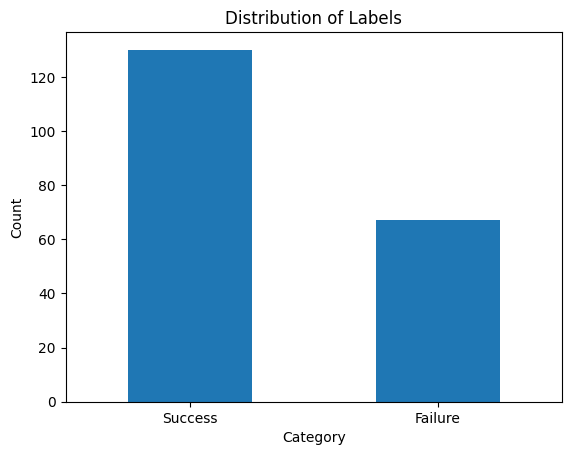

In [45]:
def plot_label_distribution(column):
    count_classes = pd.value_counts(column, sort = True)
    count_classes.plot(kind = 'bar', rot=0)

    plt.title("Distribution of Labels")
    plt.xticks(range(2), ["Success","Failure"])
    plt.xlabel("Category")
    plt.ylabel("Count")

plot_label_distribution(dataset["Failure.binary"])

Based on the figure above, the distribution of labels are imbalanced.  Therefore, we need to resample to balance the binary values.

*We Use RandomOverSampler to balance the distribution of labels.*

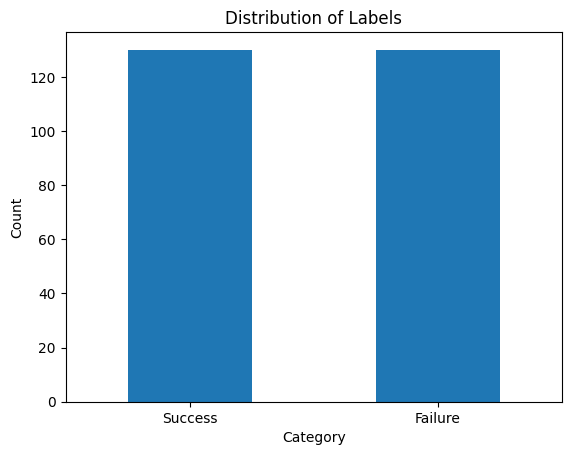

In [46]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Fit and apply the random oversampling to your dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

plot_label_distribution(y_resampled)

#### Feature Normalization

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, '')]

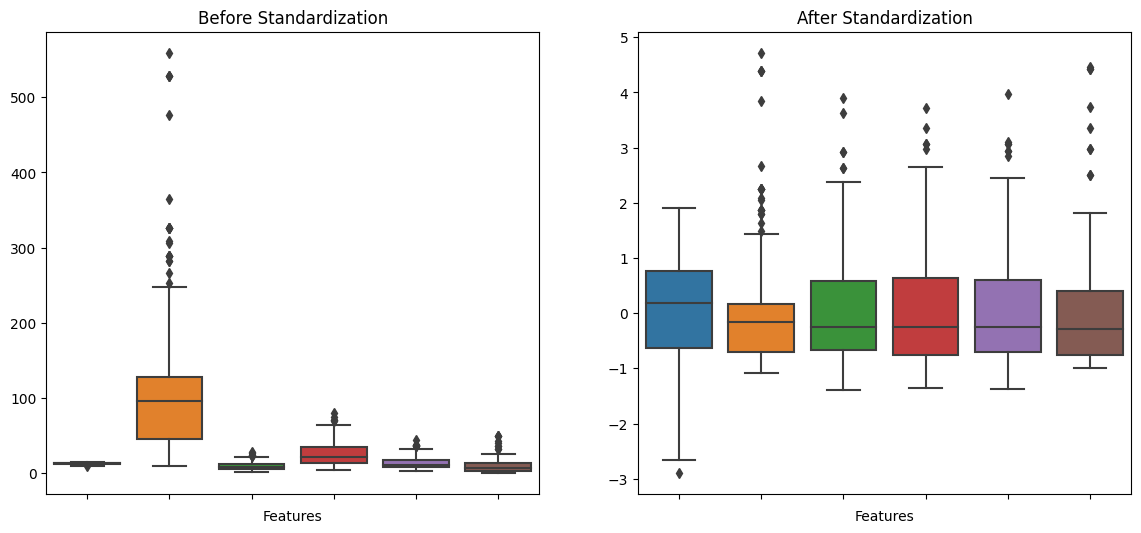

In [144]:
X_std = StandardScaler().fit_transform(X_resampled)

fig, ax = plt.subplots(1,2,figsize=(14,6))

n_rows = 6
ax[0].set_title("Before Standardization")
ax[0].set_xlabel("Features")
# ax[0].set_xticks(None)
sns.boxplot(X_resampled.iloc[:,:n_rows], ax=ax[0]).set_xticklabels([])
ax[1].set_title("After Standardization")
ax[1].set_xlabel("Features")
sns.boxplot(X_std[:,:n_rows], ax=ax[1]).set_xticklabels([])

Standardization ensures that all features contribute equally to the learning process.  We eliminate features with larger scales may dominate the learning process such as the second feature above.

#### Principal Component Analysis

In [108]:
print(X.columns)
print("Number of features: ", len(X.columns))

Index(['Entropy_cooc.W.ADC', 'GLNU_align.H.PET', 'Min_hist.PET',
       'Max_hist.PET', 'Mean_hist.PET', 'Variance_hist.PET',
       'Standard_Deviation_hist.PET', 'Skewness_hist.PET', 'Kurtosis_hist.PET',
       'Energy_hist.PET',
       ...
       'LZLGE.W.ADC', 'LZHGE.W.ADC', 'GLNU_area.W.ADC', 'ZSNU.W.ADC',
       'ZSP.W.ADC', 'GLNU_norm.W.ADC', 'ZSNU_norm.W.ADC', 'GLVAR_area.W.ADC',
       'ZSVAR.W.ADC', 'Entropy_area.W.ADC'],
      dtype='object', length=428)
Number of features:  428


There are **428 features** in the dataset!  We shall use Principal Component Analysis to reduce the number of features to smaller components.

Text(0, 0.5, 'Cumulative explained variance')

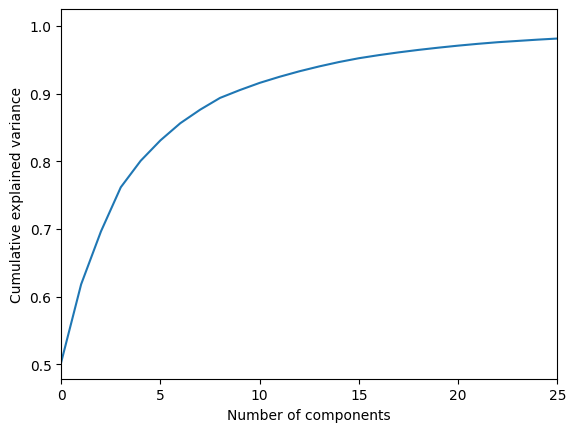

In [48]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,25,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We can achieve explained cumulative explained variance ratio of 0.95 with 15 components.

Text(0, 0.5, 'Cumulative explained variance')

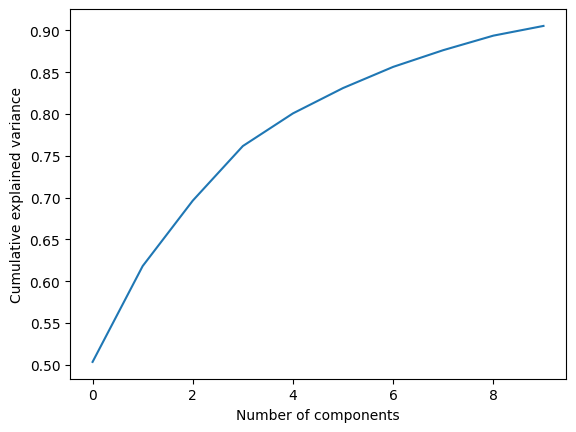

In [156]:
pca = PCA(n_components=15).fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

X_pca = pca.transform(X_std)
Y_pca = y_resampled
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


#### Train test split

In [157]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, Y_pca, test_size=0.2, random_state=42)

In [159]:
models = [
    {
    "name": "Logistic Regression",
    "model": LogisticRegression(),
    "param_grid": {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
            "max_iter": [100, 200, 300, 400, 500, 1000]
        }
    },{
    "name": "Random Forest",
    "model": RandomForestClassifier(),
    "param_grid": {
            'n_estimators': [50, 75, 100],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [1, 2, 3],
            'min_samples_leaf': [1,2,3],
        }
    },{
    "name": "KNN",
    "model": KNeighborsClassifier(),
    "param_grid": {
            'n_neighbors': [3, 5, 7, 9],    
            'weights': ['uniform', 'distance'],  
            'p': [1, 2, 3, 4, 5]                      
        }
    },{
    "name": "SVC",
    "model": SVC(),
    "param_grid": {
            'C': [0.1, 1, 3],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],
            'coef0': [0, 1, 2],
        }
    },{
    "name": "Gradient Boosting",
    "model": GradientBoostingClassifier(),
    "param_grid": {
            'n_estimators': [50, 100, 125],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5],
            'max_features': ['auto', 'sqrt', 'log2'],
    }
    }
]

In [166]:
model_results = pd.DataFrame(columns=["Best Score", "Accuracy", "F1 Score", "ROC AUC Score"])

In [170]:
for model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=43)
    grid_search = GridSearchCV(model["model"], model["param_grid"], cv=kfold, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
    print(f"Best score for {model['name']}: {grid_search.best_score_}")
    best_model = grid_search.best_estimator_
    print(f"Accuracy for {model['name']}: {best_model.score(x_test, y_test)}")

    y_pred = best_model.predict(x_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("ROC-AUC:", roc_auc)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    model_results.loc[model["name"]] = [grid_search.best_score_, accuracy, f1, roc_auc]
    
    print()


Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.7830952380952381
Accuracy for Logistic Regression: 0.6923076923076923
ROC-AUC: 0.6962962962962963
Accuracy: 0.6923076923076923
F1 Score: 0.6666666666666666

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 75}
Best score for Random Forest: 0.865
Accuracy for Random Forest: 0.7884615384615384
ROC-AUC: 0.7874074074074074
Accuracy: 0.7884615384615384
F1 Score: 0.7999999999999999

Best parameters for KNN: {'n_neighbors': 7, 'p': 5, 'weights': 'distance'}
Best score for KNN: 0.8323809523809522
Accuracy for KNN: 0.8076923076923077
ROC-AUC: 0.8059259259259259
Accuracy: 0.8076923076923077
F1 Score: 0.8214285714285715

Best parameters for SVC: {'C': 3, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.8359523809523809
Accuracy for SVC: 0.8269230769230769
ROC-AUC: 0.83185185

#### Analysis and Conclusion

In [168]:
display(model_results)

,Best Score,Accuracy,F1 Score,ROC AUC Score
Logistic Regression,0.783095,0.692308,0.666667,0.696296
Random Forest,0.870000,0.769231,0.777778,0.768889
KNN,0.832381,0.807692,0.821429,0.805926
SVC,0.835952,0.826923,0.808511,0.831852
Gradient Boosting,0.855238,0.788462,0.800000,0.787407


Among the models listed, the **Random Forest model** achieved the highest "Best Score" of 0.87, suggesting it performed the best overall according to the chosen evaluation metric, but suffers from precision and recall scores.

KNN and SVC also achieved relatively high scores, both in terms of accuracy, F1 score, and ROC AUC score.

However, logistic regression performed poorly, suggesting that the data is not linear in nature.